# COCO로 json segmentation 그려 보기

In [1]:
import json
import os
import skimage.io as io
import pylab

from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

from pycocotools.coco import COCO

%matplotlib inline
plt.rcParams["figure.figsize"] = (16,9)

pylab.rcParams["figure.figsize"]=(16,9)


In [2]:
data_path = "D:/data/도로장애물·표면 인지 영상(수도권)/Validation/CRACK/"
annot_path = data_path+"annotations/C_Frontback_B01/"
image_path = data_path+"images/C_Frontback_B01/"

images = os.listdir(image_path)
labels = os.listdir(annot_path)

im_idx = 972

annFile = annot_path+"/"+images[im_idx].replace(".png","_PLINE.json")

coco=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...


TypeError: string indices must be integers

## COCO Error (TypeError: string indices must be integers)

In [ ]:
for js in tqdm(labels):
    annFile_foot = annot_path+"/"+js
    annFile_foot_modified = annot_path.replace("annotations","anns_modifies")+"/"+js

    with open(annFile_foot) as f:
        data = json.loads(f.read())
        # print(data.keys())
        
        #add additional brackets to categories
        data['images'] = [data['images']]
        
        #export
        with open(annFile_foot_modified, 'w+') as ff:
            ff.write(json.dumps(data))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
annFile = annot_path.replace("annotations","anns_modifies")+"/"+images[im_idx].replace(".png","_PLINE.json")
print(annFile)
coco=COCO(annFile)

D:/data/도로장애물·표면 인지 영상(수도권)/Validation/CRACK/anns_modifies/C_Frontback_B01//V2F_HY_0108_20210115_143623_N_CH1_Seoul_Sun_Frontback_Day_71675_PLINE.json
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

# nms = set([cat['supercategory'] for cat in cats])
# print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
Crack



In [ ]:
catIds = coco.getCatIds(catNms=['Crack']);
imgIds = coco.getImgIds(catIds=catIds);

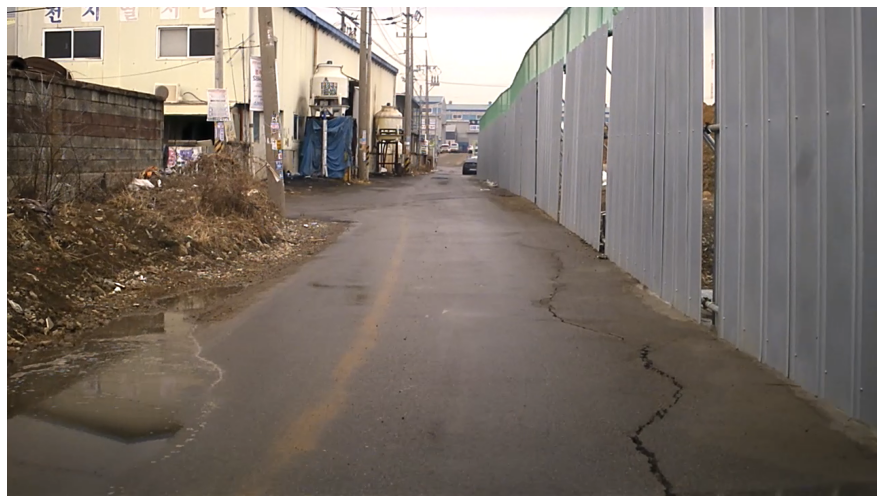

In [ ]:
Img = io.imread(image_path+"/"+images[im_idx])
plt.axis('off')
plt.imshow(Img)

[1, 2, 3]


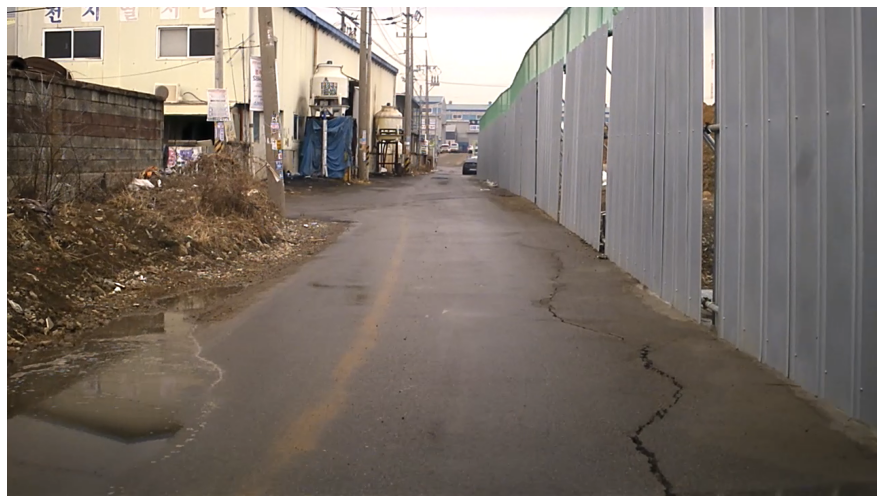

In [ ]:
plt.imshow(Img); plt.axis('off')
annIds = coco.getAnnIds(imgIds=imgIds, catIds=catIds, iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

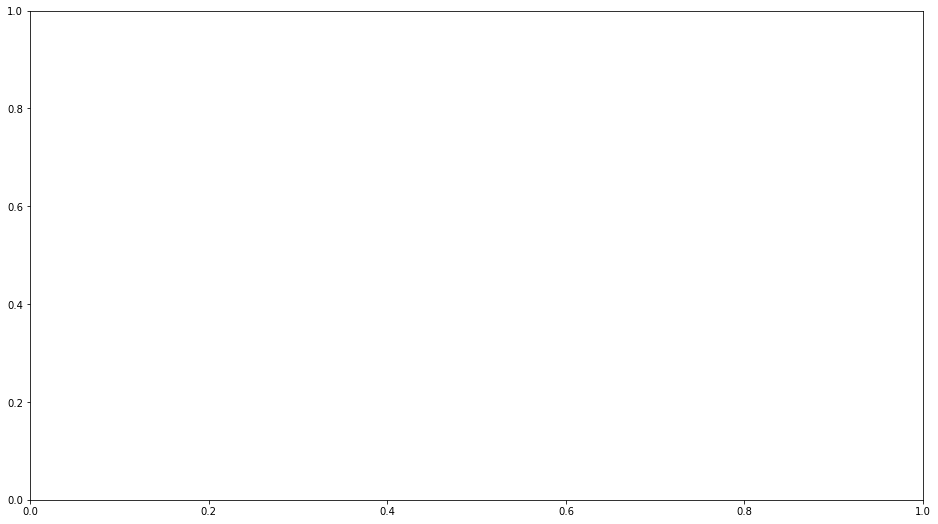

In [ ]:
coco.showAnns(anns)